<a href="https://colab.research.google.com/github/louis-sanna-eki/graph-generation/blob/master/notebooks/CO2_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

In this notebook, we demonstrate several methods for constructing a graph from a CSV file.

- in Python using matplotlib

### Setup

Connect to gdrive, install dependencies, load dependencies, set config.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install pandas

In [3]:
PATH_TO_CO2_FILE = '/content/drive/My Drive/lr-data/graph-generation/owd-co2.csv'

### Matplotlib

Famous python library to make charts, the two rivals are plotly and seaborn.

https://matplotlib.org/

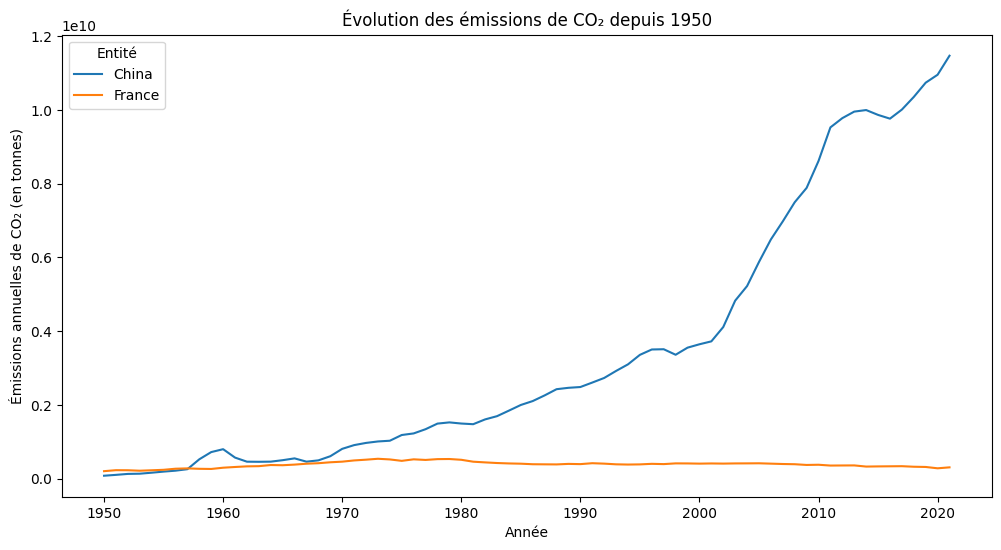

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from Google Drive
data = pd.read_csv(PATH_TO_CO2_FILE, delimiter=';')

# Filter data for years since 1950 and specified entities
filtered_data = data[(data['Year'] >= 1950) & (data['Entity'].isin(["France", "China"]))]

# Group data by year and entity
grouped_data = filtered_data.groupby(['Year', 'Entity'])['Annual CO₂ emissions'].sum().unstack()

# Create the plot
plt.figure(figsize=(12, 6))
for entity in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[entity], label=entity)

# Adding labels, title, and legend in French
plt.xlabel('Année')
plt.ylabel('Émissions annuelles de CO₂ (en tonnes)')
plt.title('Évolution des émissions de CO₂ depuis 1950')
plt.legend(title='Entité')

# Show the plot
plt.show()


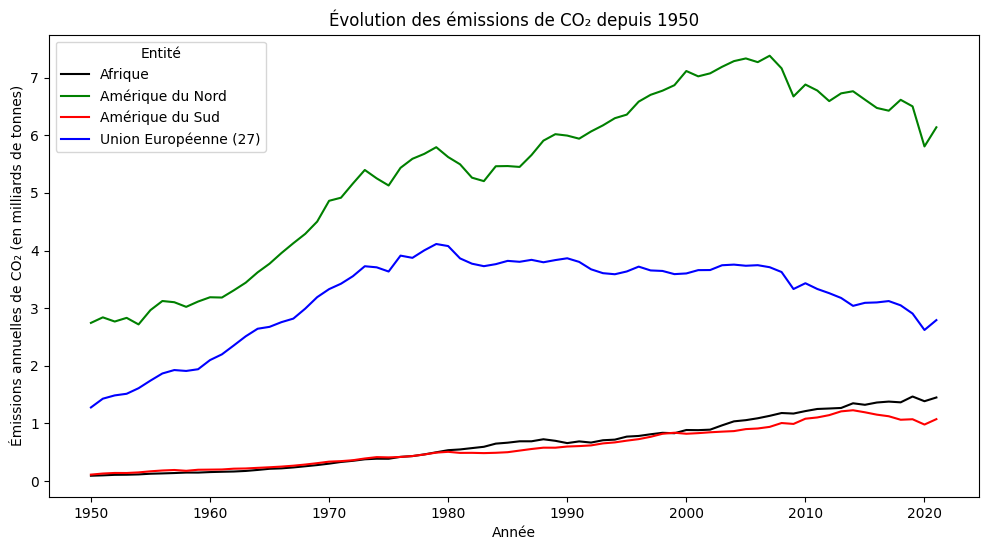

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from Google Drive
data = pd.read_csv(PATH_TO_CO2_FILE, delimiter=';')

# Filter data for years since 1950 and specified entities
entities = ["Africa", "European Union (27)", "North America", "South America"]
filtered_data = data[(data['Year'] >= 1950) & (data['Entity'].isin(entities))]

# Group data by year and entity
grouped_data = filtered_data.groupby(['Year', 'Entity'])['Annual CO₂ emissions'].sum().unstack()

# Define specific colors for each continent
colors = {"Africa": "black", "European Union (27)": "blue", "North America": "green", "South America": "red"}

# Translation dictionary for entity names
entity_translations = {
    "Africa": "Afrique",
    "European Union (27)": "Union Européenne (27)",
    "North America": "Amérique du Nord",
    "South America": "Amérique du Sud"
}

# Sort entities by French alphabetical order
sorted_entities = sorted(entity_translations.keys(), key=lambda x: entity_translations[x])

# Create the plot
plt.figure(figsize=(12, 6))
for entity in sorted_entities:
    translated_entity = entity_translations[entity]
    plt.plot(grouped_data.index, grouped_data[entity]/1e9, label=translated_entity, color=colors[entity])

# Adding labels, title, and legend in French
plt.xlabel('Année')
plt.ylabel('Émissions annuelles de CO₂ (en milliards de tonnes)')
plt.title('Évolution des émissions de CO₂ depuis 1950')
plt.legend(title='Entité')

# Show the plot
plt.show()
